In [ ]:
# EVDS and its prerequisite packages are installed here.
install.packages("devtools")
devtools::install_github("algopoly/EVDS", force = TRUE)
install.packages("ggplot2")

# setting EVDS key
EVDS::set_evds_key("UIwrpiUF7p")

In [2]:
library(EVDS)
library(ggplot2)

In [3]:
# the dates in the series are not formatted in any built-in type, so I've written a formatter
special_dateconv <- function(x) {
    tokens <- unlist(strsplit(x, "-"))
    month_length <- nchar(tokens[2])
    if (month_length == 1) {
        tokens[2] <- paste("0", tokens[2], sep = "")
    }
    tokens <- append(tokens, c("01"))
    str_date <- paste(tokens, collapse = "-")
    str_date
}

In [4]:
# For my first analysis, I've retrieved the interest rates for deposits in EUR, USD, and TRY and plotted them from January 1st, 2011 to January 1st, 2021.
df <- get_series(series = c("TP.MT210AGS.EUR.MT06","TP.MT210AGS.TRY.MT06", "TP.MT210AGS.USD.MT06"), start_date = "01-01-2011", end_date = "01-01-2021")
# df has unnecessary columns in it so I've only selected the items
df_cleaned <- df$items
# df_cleaned also has unnecessary columnt UNIXTIME, thus I've selected the meaningful ones.
df1 <- df_cleaned[c("Tarih", "TP_MT210AGS_EUR_MT06", "TP_MT210AGS_TRY_MT06", "TP_MT210AGS_USD_MT06")]

# At first, I've formatted the date strings to the correct form via the function I've written above.
df1[1] <- apply(df1[1], FUN = special_dateconv, MARGIN = 1)
# Then, I've converted the suitable date strings to the date objects of R.
df1$Tarih <- as.Date(df1$Tarih, format = "%Y-%m-%d")
# Hence, I've converted the decimal strings to double values. 
df1[, 2:4] <- sapply(df1[, 2:4], as.numeric)
# There were several incomplete observations, thus I've omitted them.
df1 <- na.omit(df1)

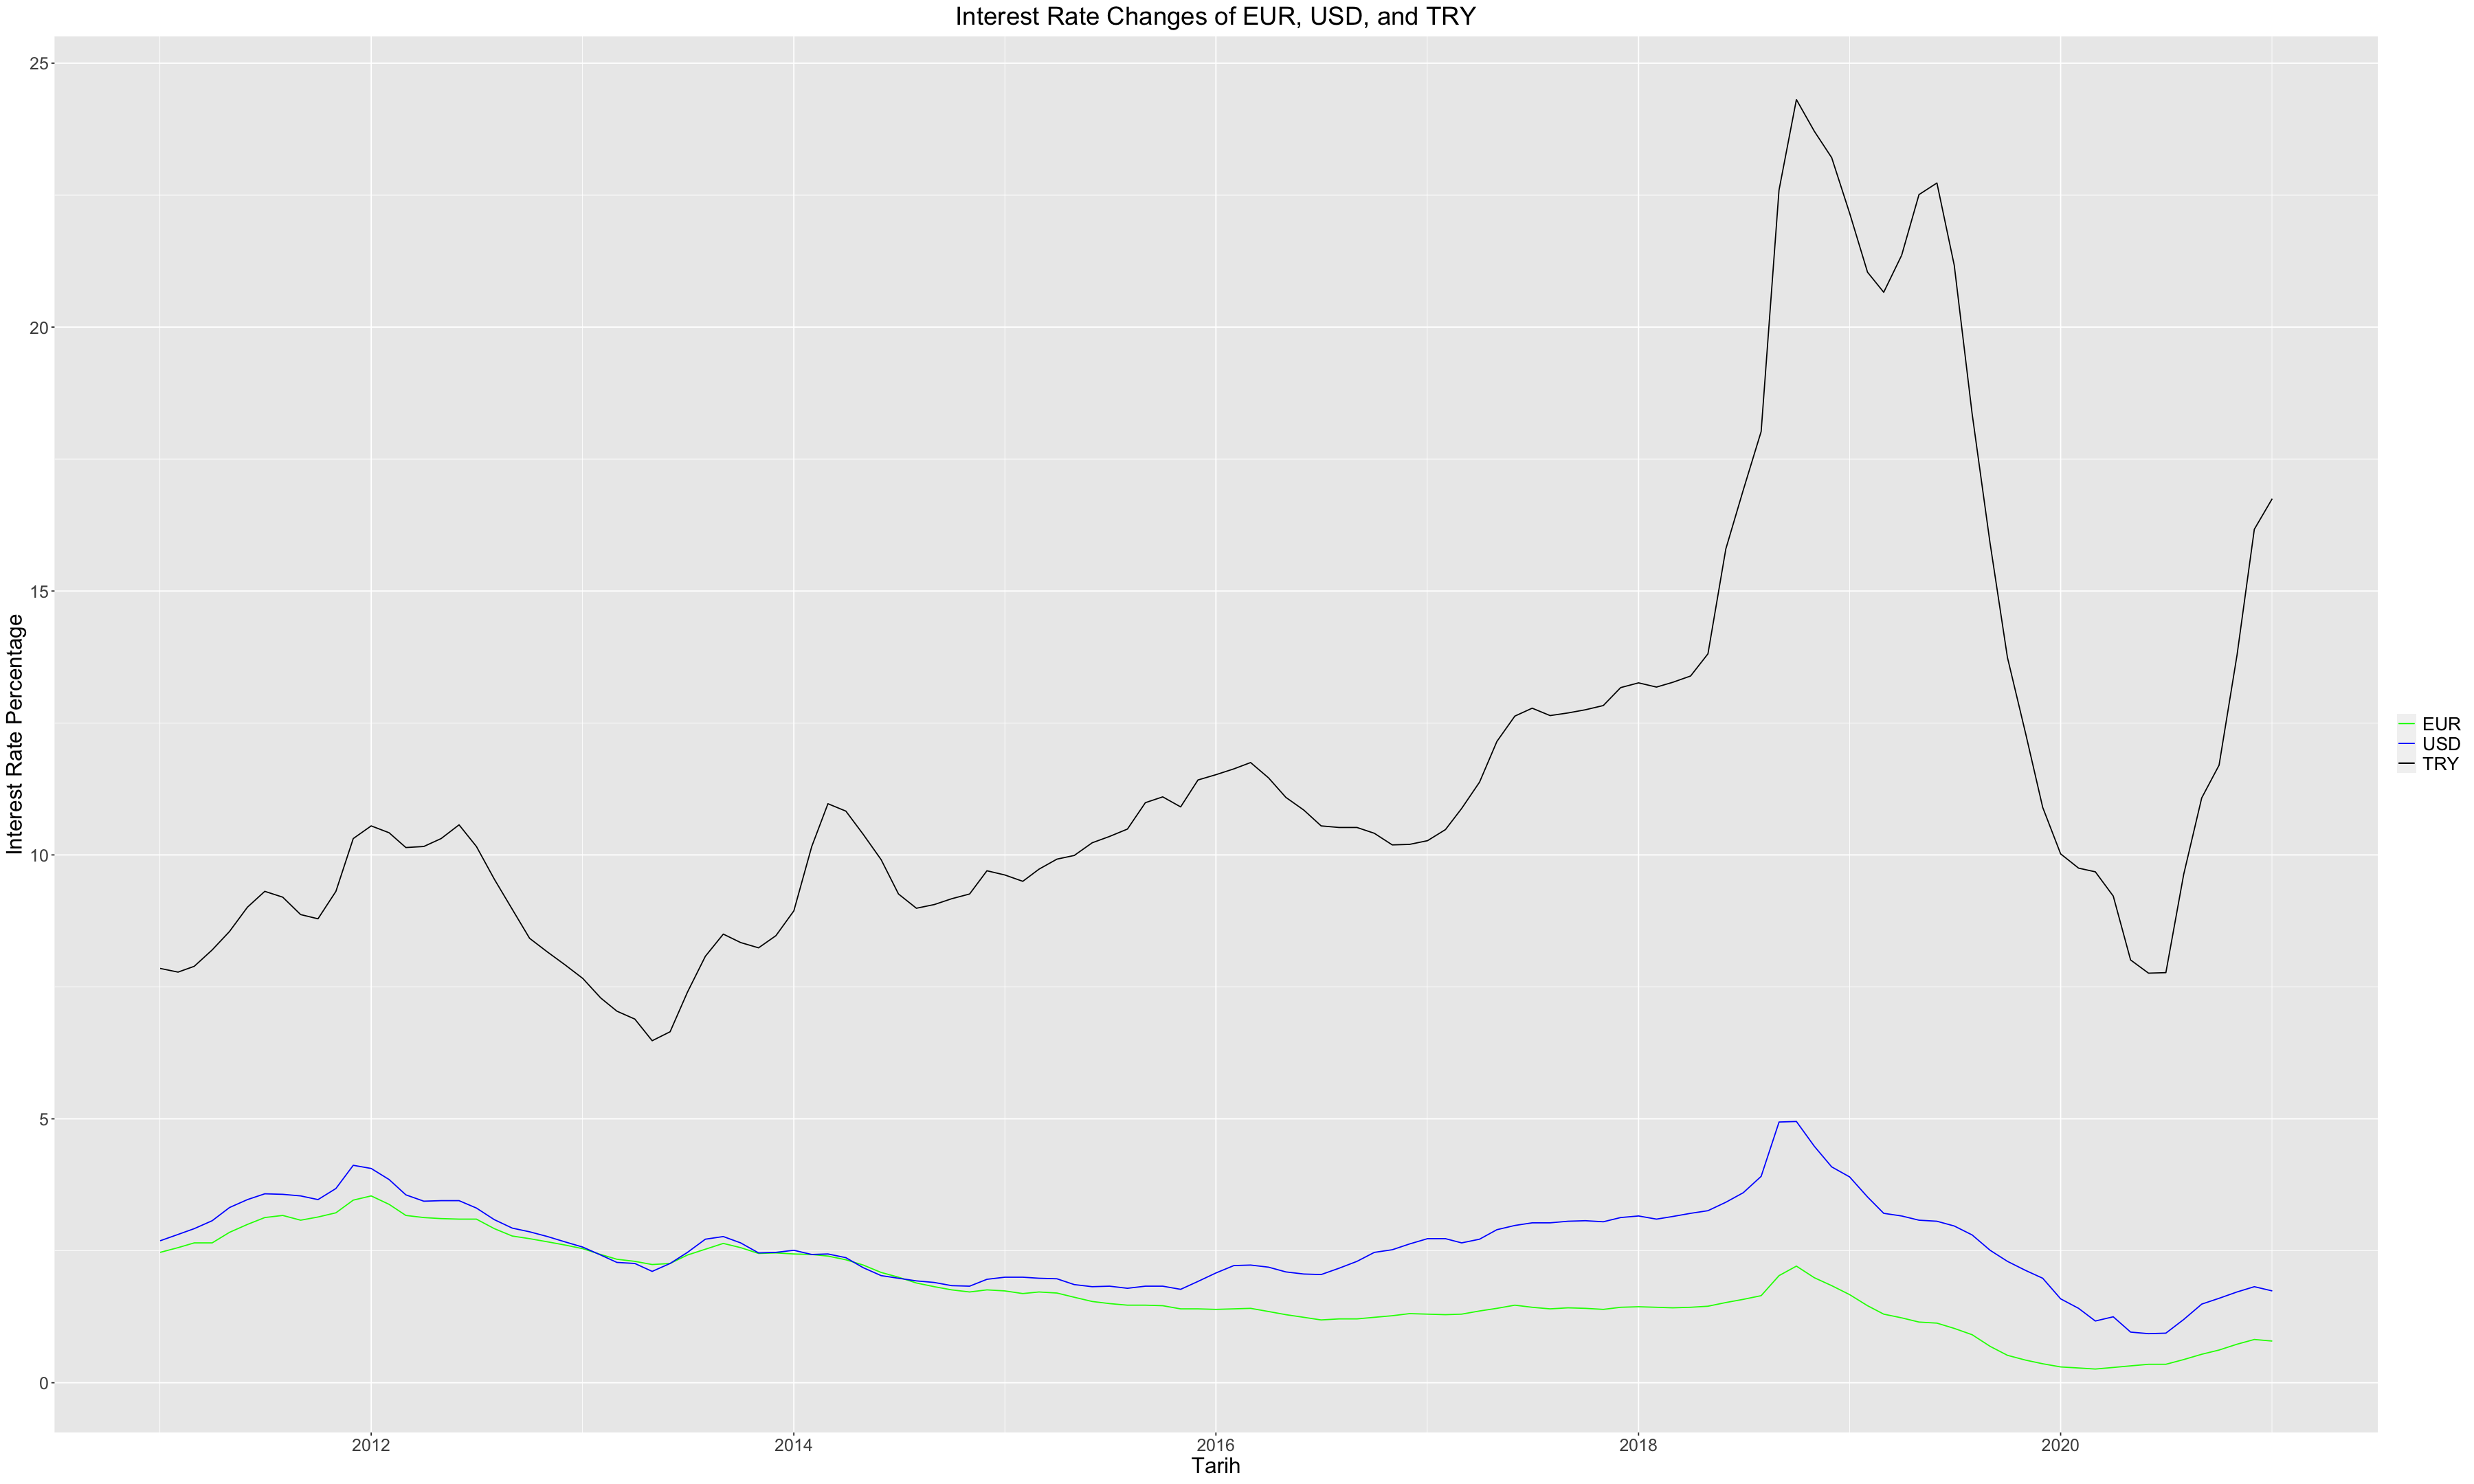

In [5]:
# I've set plot width and height for all plots below.
options(repr.plot.width=30, repr.plot.height=18)

# I've plotted the data of my first analysis below.
ggplot(df1, aes(x=Tarih)) + geom_line(aes(y=TP_MT210AGS_EUR_MT06, colour = "EUR")) + geom_line(aes(y=TP_MT210AGS_USD_MT06, colour = "USD")) + geom_line(aes(y=TP_MT210AGS_TRY_MT06, colour = "TRY")) + scale_colour_manual("", breaks = c("EUR", "USD", "TRY"), values = c("green", "blue", "black")) + labs(colour = "Currencies", title = "Interest Rate Changes of EUR, USD, and TRY", y="Interest Rate Percentage") + theme(legend.text = element_text(size = 16), axis.title.y = element_text(size = 19), axis.title.x = element_text(size = 19), axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), plot.title = element_text(size = 22, hjust = 0.5))

In [6]:
# For my second analysis, I've retrieved the interest rates for deposits in EUR, USD, and TRY and plotted them from January 1st, 2011 to January 1st, 2021.
df2 <- get_series(series = c("TP.DK.USD.A.YTL","TP.DK.EUR.A.YTL", "TP.DK.CAD.A.YTL", "TP.DK.CHF.A.YTL", "TP.DK.GBP.A.YTL"), start_date = "01-01-2011", end_date = "01-01-2021")
# df has unnecessary columns in it so I've only selected the items
df2_cleaned <- df2$items
# df_cleaned also has unnecessary columnt UNIXTIME, thus I've selected the meaningful ones.
df3 <- df2_cleaned[c("Tarih", "TP_DK_USD_A_YTL", "TP_DK_EUR_A_YTL", "TP_DK_CAD_A_YTL", "TP_DK_CHF_A_YTL", "TP_DK_GBP_A_YTL")]

# At first, I've converted the date strings to the date objects.
df3$Tarih <- as.Date(df3$Tarih, format = "%d-%m-%Y")
# Hence, I've converted the decimal strings to double values. 
df3[, 2:6] <- sapply(df3[, 2:6], as.numeric)
# There were several incomplete observations, thus I've omitted them.
df3 <- na.omit(df3)

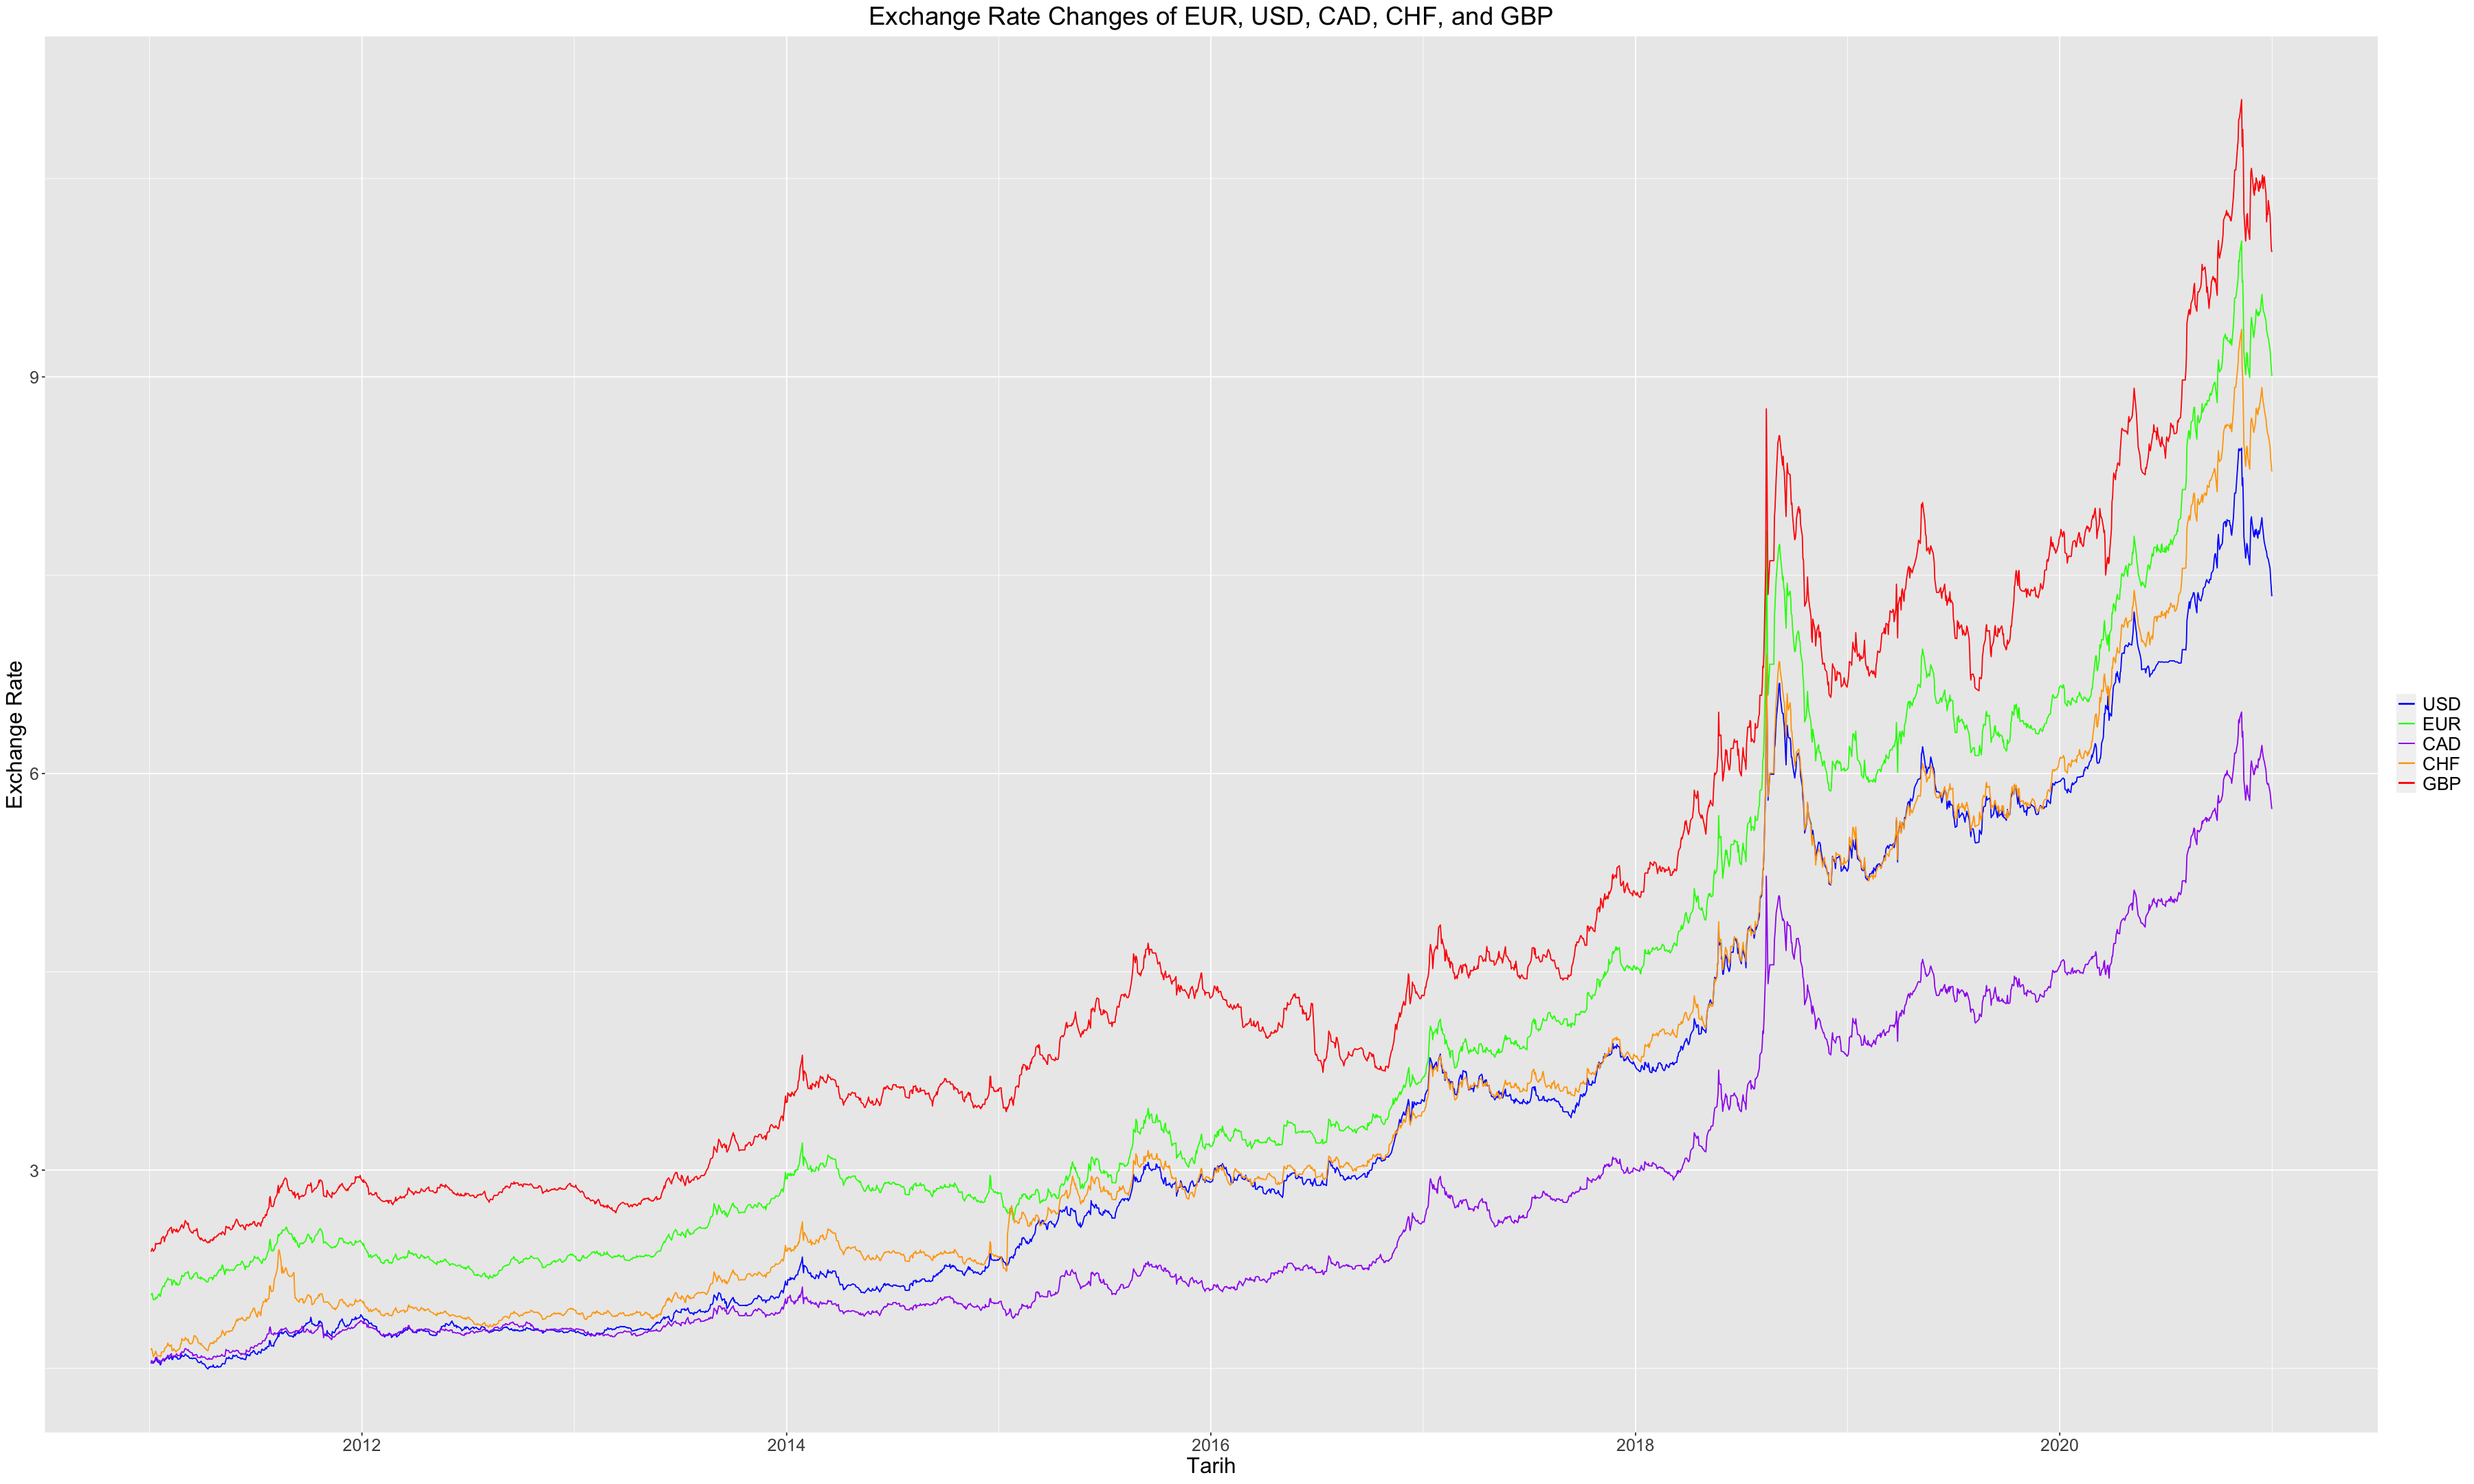

In [7]:
# I've plotted the data of my second analysis below.
ggplot(df3, aes(x=Tarih)) + geom_line(aes(y=TP_DK_USD_A_YTL, colour = "USD")) + geom_line(aes(y=TP_DK_EUR_A_YTL, colour = "EUR")) + geom_line(aes(y=TP_DK_CAD_A_YTL, colour = "CAD")) + geom_line(aes(y=TP_DK_CHF_A_YTL, colour = "CHF")) + geom_line(aes(y=TP_DK_GBP_A_YTL, colour = "GBP")) + scale_colour_manual("", breaks = c("USD", "EUR", "CAD", "CHF", "GBP"), values = c("blue", "green", "purple", "orange", "red")) + labs(colour = "Currencies", title = "Exchange Rate Changes of EUR, USD, CAD, CHF, and GBP", y="Exchange Rate") + theme(legend.text = element_text(size = 16), axis.title.y = element_text(size = 19), axis.title.x = element_text(size = 19), axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), plot.title = element_text(size = 22, hjust = 0.5))

In [17]:
# For my second analysis, I've retrieved the interest rates for deposits in EUR, USD, and TRY and plotted them from January 1st, 2011 to January 1st, 2021.
df4 <- get_series(series = c("TP.YISGUCU2.G1","TP.YISGUCU2.G2", "TP.YISGUCU2.G3", "TP.YISGUCU2.G4"), start_date = "01-01-2014", end_date = "01-01-2021")
# df has unnecessary columns in it so I've only selected the items
df4_cleaned <- df4$items
# df_cleaned also has unnecessary columnt UNIXTIME, thus I've selected the meaningful ones.
df5 <- df4_cleaned[c("Tarih", "TP_YISGUCU2_G1", "TP_YISGUCU2_G2", "TP_YISGUCU2_G3", "TP_YISGUCU2_G4")]

#
df5[1] <- apply(df5[1], FUN = special_dateconv, MARGIN = 1)
# At first, I've converted the date strings to the date objects.
df5$Tarih <- as.Date(df5$Tarih, format = "%Y-%m-%d")
# Hence, I've converted the decimal strings to double values. 
df5[, 2:5] <- sapply(df5[, 2:5], as.numeric)
# There were several incomplete observations, thus I've omitted them.
df5 <- na.omit(df5)

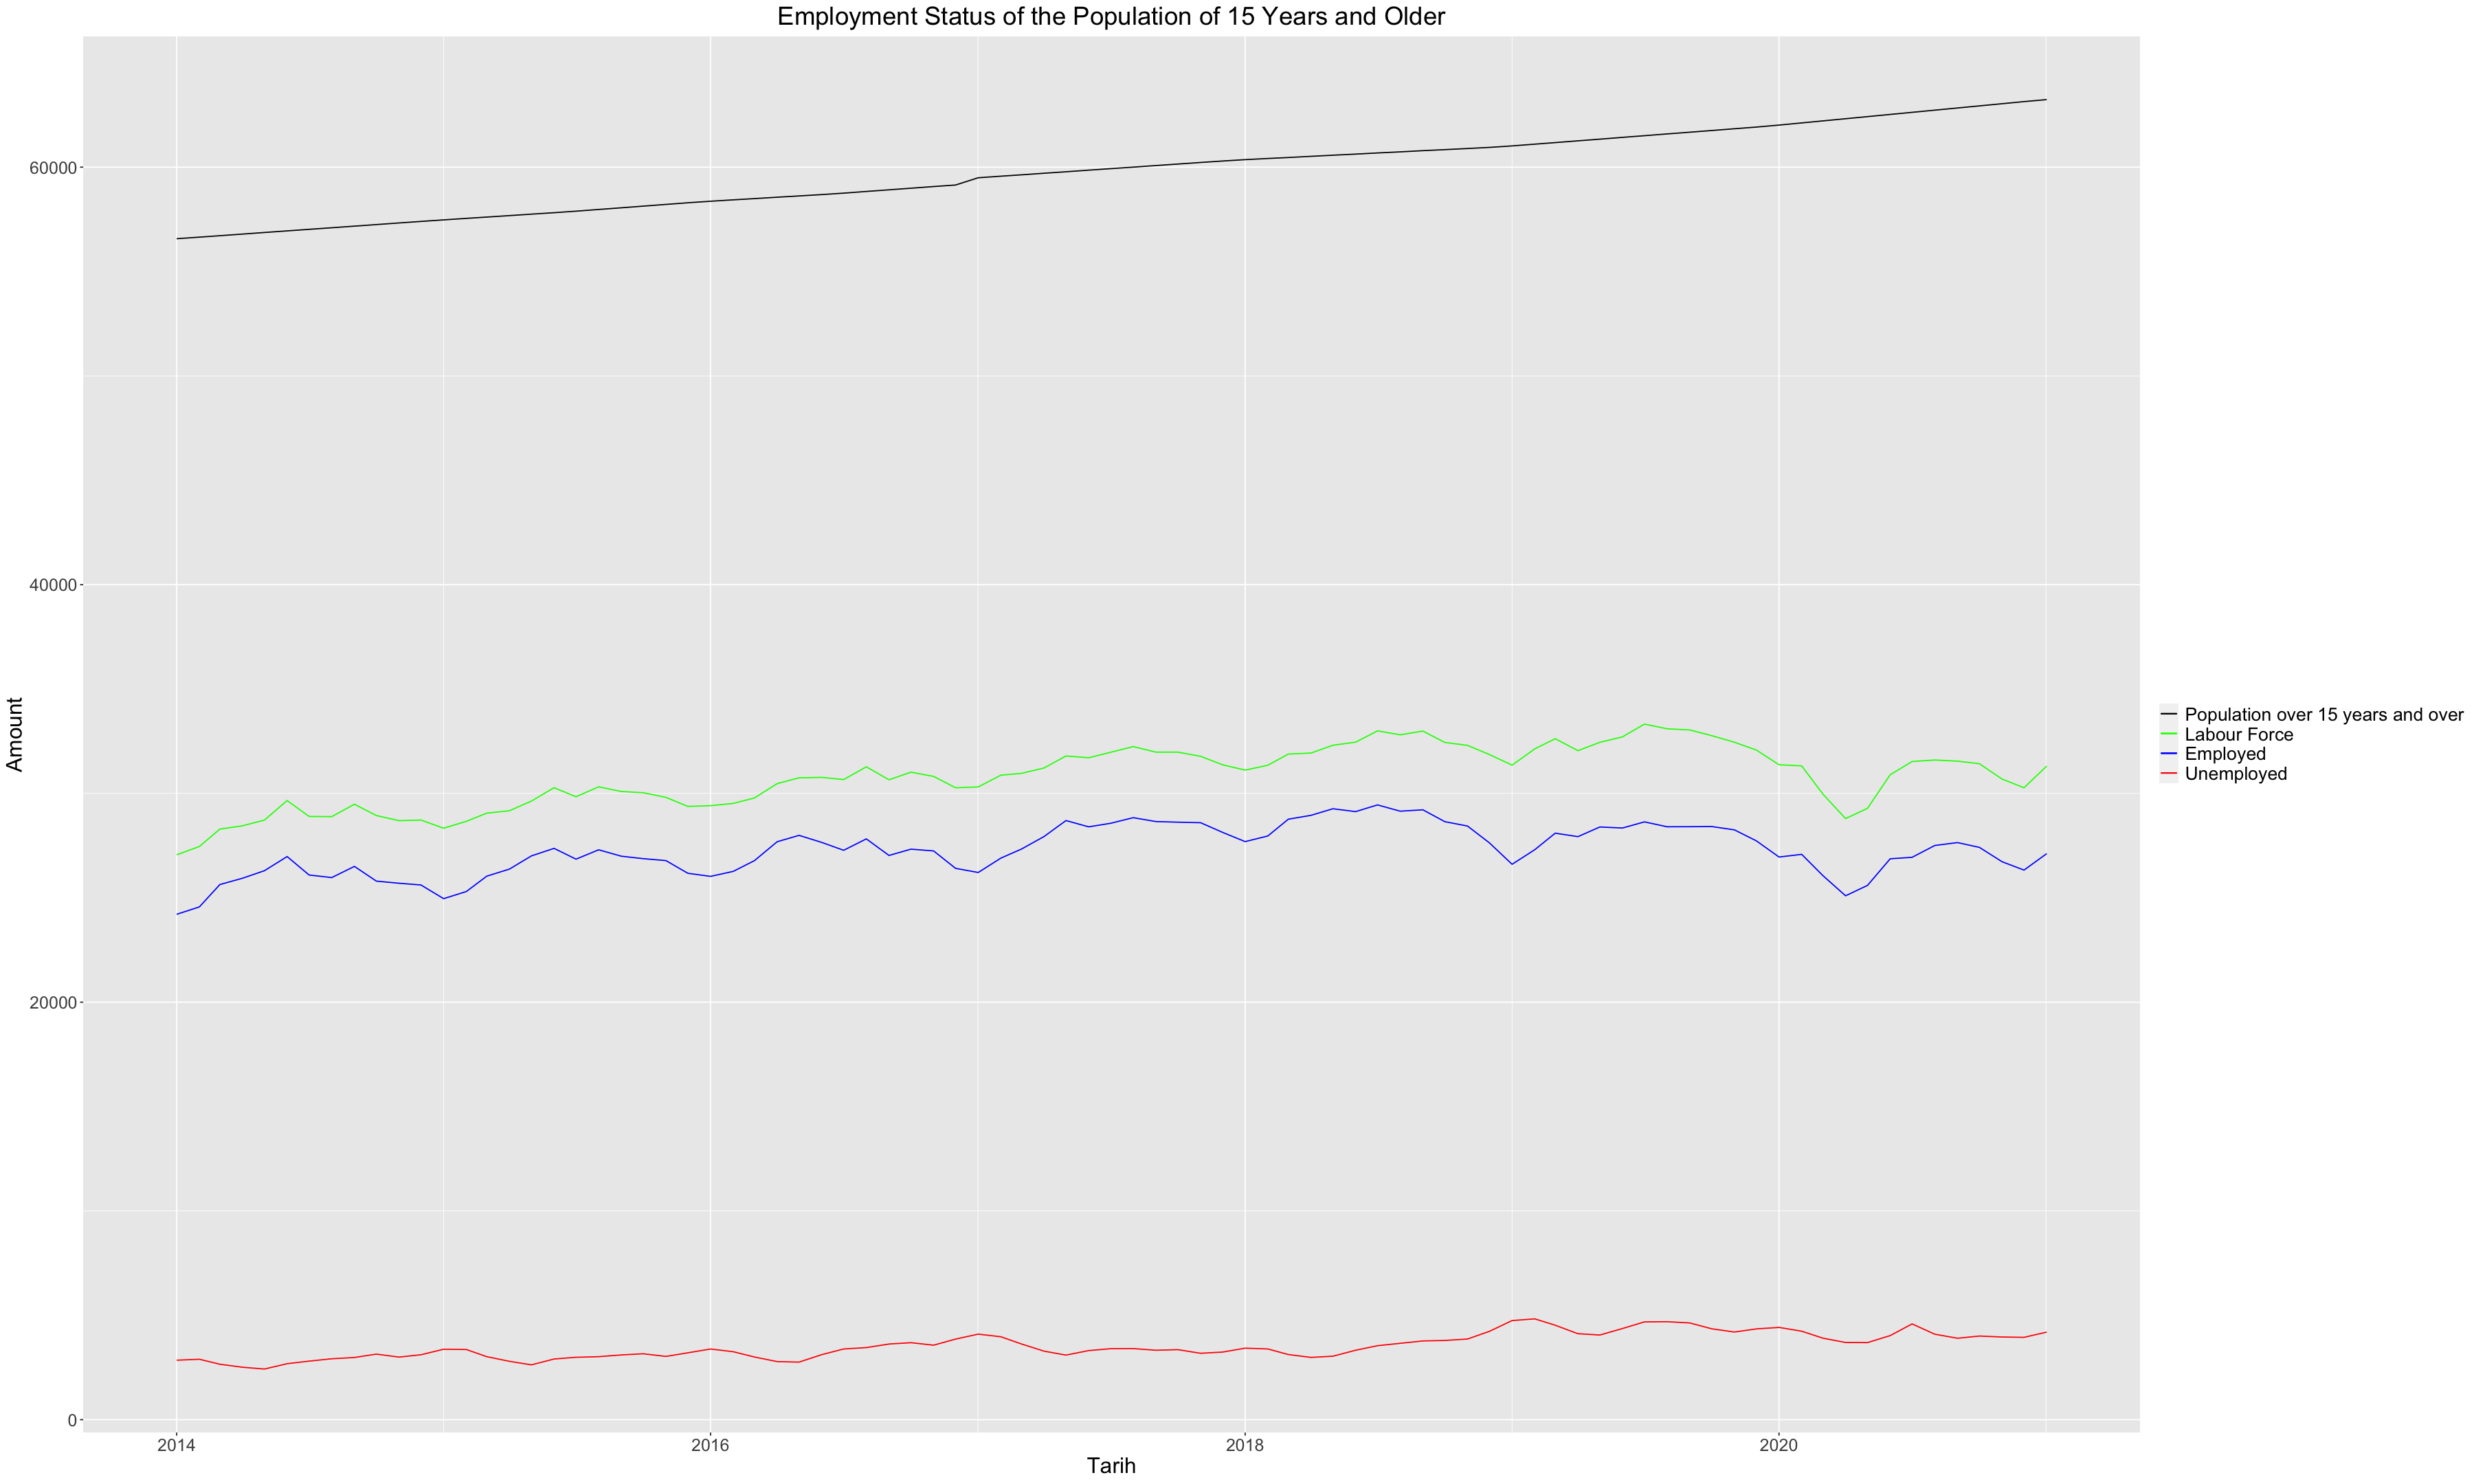

In [20]:
# I've plotted the data of my third analysis below.
ggplot(df5, aes(x=Tarih)) + geom_line(aes(y=TP_YISGUCU2_G1, colour = "Population over 15 years and over")) + geom_line(aes(y=TP_YISGUCU2_G2, colour = "Labour Force")) + geom_line(aes(y=TP_YISGUCU2_G3, colour = "Employed")) + geom_line(aes(y=TP_YISGUCU2_G4, colour = "Unemployed")) + scale_colour_manual("", breaks = c("Population over 15 years and over", "Labour Force", "Employed", "Unemployed"), values = c("black", "green", "blue", "red")) + labs(colour = "Employment Status", title = "Employment Status of the Population of 15 Years and Older", y="Amount") + theme(legend.text = element_text(size = 16), axis.title.y = element_text(size = 19), axis.title.x = element_text(size = 19), axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), plot.title = element_text(size = 22, hjust = 0.5))